In [1]:
import tensorflow as tf

In [2]:
batch_size = 32

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True
)

train_it = datagen.flow_from_directory(
    'data/data',
    class_mode='binary',
    batch_size=batch_size
)

val_it = datagen.flow_from_directory(
    'data/val',
    class_mode='binary',
    batch_size=batch_size
)

Found 12735 images belonging to 2 classes.
Found 635 images belonging to 2 classes.


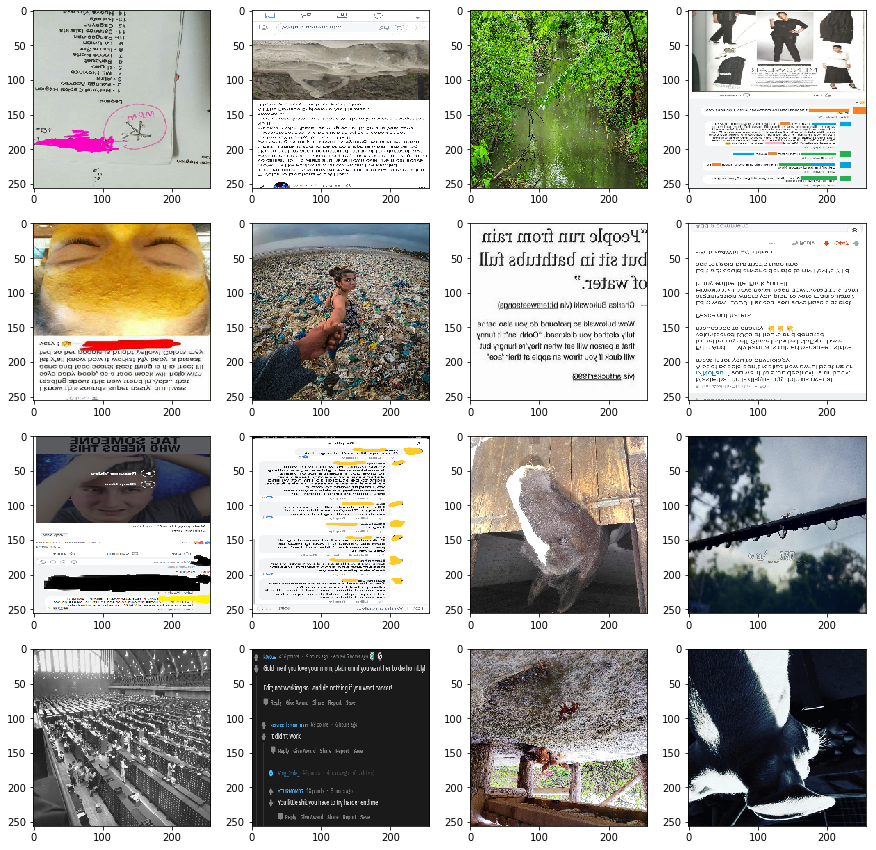

In [6]:
figsize(15, 15)
batch = train_it.next()[0]
for i in range(4 * 4):
    subplot(4, 4, i+1)
    imshow(batch[i, :, :])

In [7]:
base_model = tf.keras.applications.DenseNet169(weights=None, include_top=False, input_shape=(160, 160, 3))
base_model.trainable = True

In [8]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 5, 5, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1664)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1665      
Total params: 12,644,545
Trainable params: 12,486,145
Non-trainable params: 158,400
_________________________________________________________________


In [11]:
history = model.fit(
    train_it,
    steps_per_epoch=train_it.samples // batch_size,
    validation_data=val_it, 
    validation_steps=val_it.samples // batch_size,
    epochs=4
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 397 steps, validate for 19 steps
Epoch 1/4
168/397 [===========>..................] - ETA: 3:57 - loss: 0.1799 - accuracy: 0.9388

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


397/397 [==============================] - 393s 990ms/step - loss: 0.1422 - accuracy: 0.9520 - val_loss: 3.2773 - val_accuracy: 0.5197
Epoch 2/4
397/397 [==============================] - 367s 926ms/step - loss: 0.0833 - accuracy: 0.9716 - val_loss: 0.4678 - val_accuracy: 0.7796
Epoch 3/4
397/397 [==============================] - 368s 927ms/step - loss: 0.0779 - accuracy: 0.9735 - val_loss: 0.1011 - val_accuracy: 0.9556
Epoch 4/4
397/397 [==============================] - 368s 926ms/step - loss: 0.0689 - accuracy: 0.9773 - val_loss: 0.0595 - val_accuracy: 0.9836


In [14]:
model.save('model.h5')